# ASSIGNMENT 3 NON PARAMETRIC TESTS

# 1. Import NPRS DATA and name it as pain_nprs. 

In [9]:
import pandas as pd

pain_nprs = pd.read_csv("NPRS DATA.csv")
pain_nprs

,Group,NPRS_before,NPRS_after
0,A,7,6
1,A,7,6
2,A,6,64
3,A,8,4
4,A,6,4
5,A,7,5
6,A,6,5
7,A,7,6
8,A,8,4
9,A,9,3


# Find median NPRS before and after treatment.

In [12]:
import numpy as np

med_before = np.median(pain_nprs['NPRS_before'])
med_before

7.0

In [13]:
med_after = np.median(pain_nprs['NPRS_after'])
med_after

5.0

# 2. Is post treatment NPRS score significantly 
# less as compared to ‘before treatment’ NPRS 
# score for Group A?

In [15]:
from scipy.stats import wilcoxon

group_A_data = pain_nprs[pain_nprs['Group']=='A']
group_A_data

,Group,NPRS_before,NPRS_after
0,A,7,6
1,A,7,6
2,A,6,64
3,A,8,4
4,A,6,4
5,A,7,5
6,A,6,5
7,A,7,6
8,A,8,4
9,A,9,3


In [18]:
statistic,p_value = wilcoxon(group_A_data['NPRS_before'],group_A_data['NPRS_after'])
statistic,p_value
print(f"wilcoxon statistic: {statistic}")
print(f"P_value: {p_value}")

wilcoxon statistic: 15.0
P_value: 0.009567852476852799



### Inference: With p-value = 0.009567852476852799, H0 is rejected as p<0.05. Post treatment NPRS score was significantly less than before treatment for Group A; hence, pain level decreased after 3 days of the drug treatment. 

# 3. Is post treatment NPRS score significantly less as compared to ‘before treatment’ NPRS score for Group B?

In [19]:
group_B_data = pain_nprs[pain_nprs['Group']=='B']
group_B_data

,Group,NPRS_before,NPRS_after
16,B,8,5
17,B,6,6
18,B,7,4
19,B,8,5
20,B,7,6
21,B,7,5
22,B,7,6
23,B,6,4
24,B,6,5
25,B,7,6


In [21]:
statistic,p_value = wilcoxon(group_B_data['NPRS_before'],group_B_data['NPRS_after'])
print(f"wilcoxon statistic: {statistic}")
print(f"P_value: {p_value}")

wilcoxon statistic: 0.0
P_value: 0.0005537177958275885


### Inference: With p-value = 0.0005537177958275885, H0 is rejected as p<0.05. Post treatment NPRS score was significantly less than before treatment for Group B; hence, pain level decreased after 3 days of the placebo treatment.

# 4. Is the change in NPRS for group ‘A’ significantly different than group ‘B’?

In [24]:
# Create a new variable named change_in_NPRS
pain_nprs["Change_in_NPRS"] = pain_nprs["NPRS_before"] - pain_nprs["NPRS_after"]
pain_nprs

,Group,NPRS_before,NPRS_after,Change_in_NPRS
0,A,7,6,1
1,A,7,6,1
2,A,6,64,-58
3,A,8,4,4
4,A,6,4,2
5,A,7,5,2
6,A,6,5,1
7,A,7,6,1
8,A,8,4,4
9,A,9,3,6


In [ ]:
# Assign Changes in NPRS score to group A and group B
group_A_changes = pain_nprs[pain_nprs['Group'] == 'A']['Change_in_NPRS']
group_B_changes = pain_nprs[pain_nprs['Group'] == 'B']['Change_in_NPRS']

In [23]:
from scipy.stats import mannwhitneyu

statistic,p_value = mannwhitneyu(group_A_data['NPRS_before']- group_A_data['NPRS_after'],
                                 group_B_data['NPRS_before']- group_B_data['NPRS_after'])
print(f"Mann-Whitney U Statistic: {statistic}")
print(f"P_value: {p_value}")

Mann-Whitney U Statistic: 105.0
P_value: 0.37803806569987897


In [28]:
# Also Mann-Whitney U test for difference in Change_in_NPRS btw groups A & B
statistic,p_value = mannwhitneyu(group_A_changes,group_B_changes, alternative = 'two-sided')
print("Mann-Whitney U Test:")
print(f"U Statistic: {statistic}")
print(f"P_value: {p_value}")

Mann-Whitney U Test:
U Statistic: 105.0
P_value: 0.37803806569987897


### Inference: With output p-value = 0.37803806569987897; p > 0.05 so we accept H0 that average change in pain level for Group A is not significantly more than Group B. Hence, there is no significant difference between the drug and placebo treatments.

In [27]:
# Wilcoxon Signed Rank test for difference in Change_in_NPRS btw groups A & B
statistic,p_value = wilcoxon(group_A_changes,group_B_changes)
print("Wilcoxon Signed-Rank Test:") 
print(f"statistic: {statistic}")
print(f"P_value: {p_value}")

Wilcoxon Signed-Rank Test:
statistic: 31.0
P_value: 0.5243217489199605


### Inference: With output p-value = 0.5243217489199605; p > 0.05 so we accept H0 that average change in pain level for Group A is not significantly more than Group B. Hence, there is no significant difference between the drug and placebo treatments.

# 5. Present change in NPRS for each group using box-whisker plot.

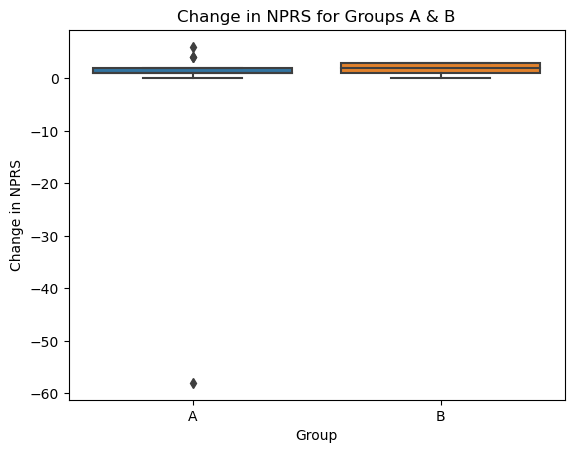

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box-Wisker Plot OF Changes in NPRS for group A and group B
sns.boxplot(x='Group', y='Change_in_NPRS', data=pain_nprs)
plt.title('Change in NPRS for Groups A & B')
plt.xlabel('Group')
plt.ylabel('Change in NPRS')
plt.show()